## Jupyter declarations

In [1]:
%matplotlib inline

## Imports

In [2]:
import os
import cv2
import numpy as np
import math
import functools 
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
plt.rcParams["figure.figsize"] = (20,10)

## Read image

In [3]:
def read_image(filename):
    return cv2.imread(filename)

## Show image

In [4]:
def show_image(title, image):
    plt.imshow(image)
    plt.title(title)
    plt.show()

## Histogram

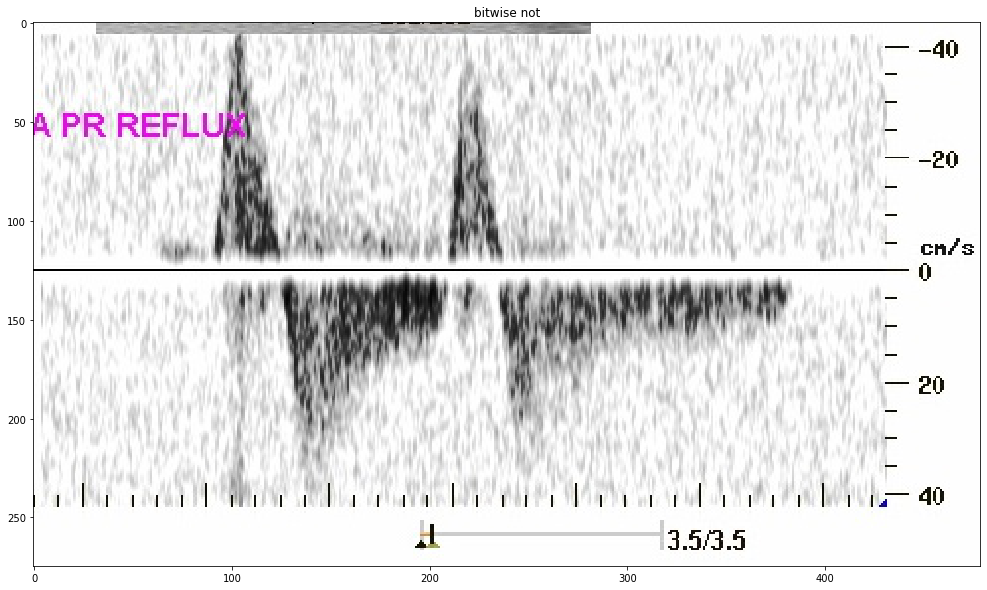

custer [[155.70978108 155.49929705 155.44948785]
 [252.93112705 252.91115216 252.72971842]
 [215.56753372 215.37691388 215.49729637]
 [ 20.57508993  20.27697842  17.75539568]
 [236.1765384  235.41175068 236.10979488]
 [187.72702164 187.5557772  187.58293693]
 [192.32335329  40.8742515  192.51696607]
 [ 65.18369758  64.97903131  65.4264619 ]
 [113.1642925  112.42592593 113.08214625]]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


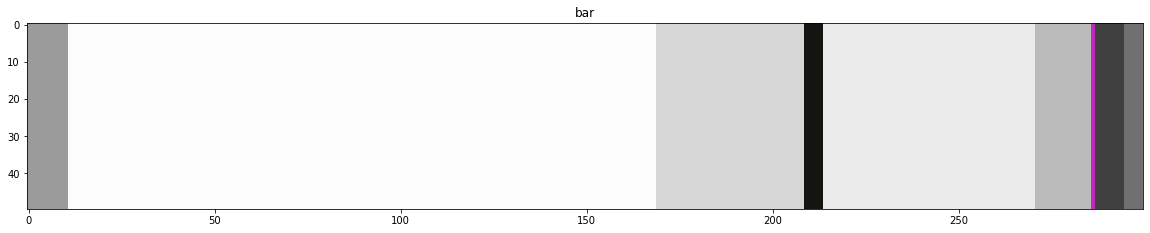

[[20, 20, 17], [65, 64, 65], [113, 112, 113], [192, 40, 192], [155, 155, 155], [187, 187, 187], [215, 215, 215], [236, 235, 236], [252, 252, 252]]


In [26]:
image_path = 'Photos/43.jpg'
image = read_image(image_path)

def get_histogram(image):
    results = []
    image = image.copy()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.bitwise_not(image)
    show_image('bitwise not', image)

    image = image.reshape((image.shape[0] * image.shape[1], 3))
    clt = KMeans(n_clusters=9)
    clt.fit(image)
    
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    hist = hist.astype("float")
    hist /= hist.sum()
    
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0
    print('custer', clt.cluster_centers_)
    for (percent, color) in zip(hist, clt.cluster_centers_):
        # plot the relative percentage of each cluster
        print(type(color))
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX
        results.append(color.astype("uint8").tolist())

    # return the bar chart
    show_image('bar', bar)
    return sorted(results, key = lambda x: x[0]+x[1]+x[2])

bar = get_histogram(image)
print(bar)

## Manual threshold

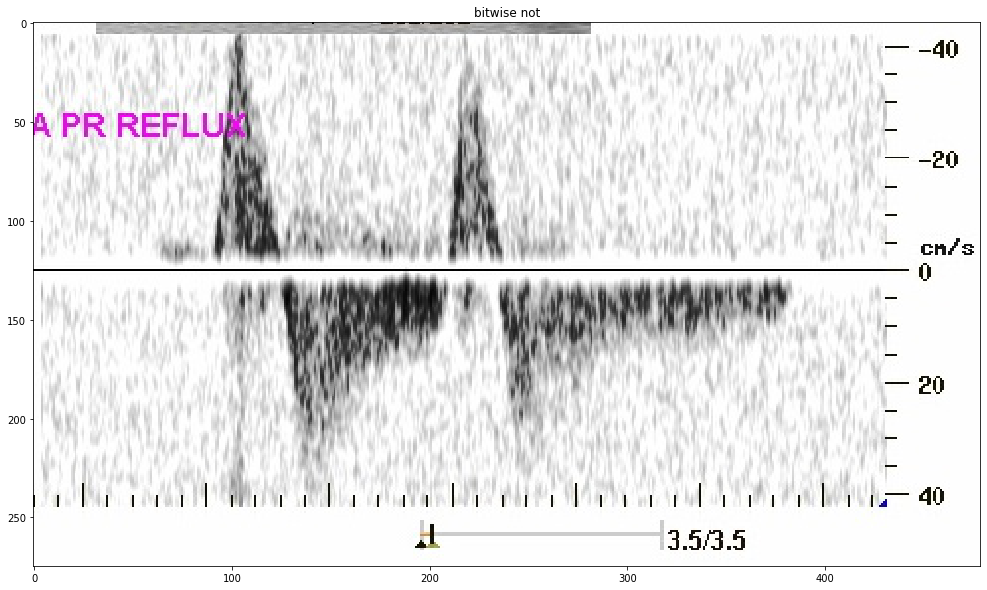

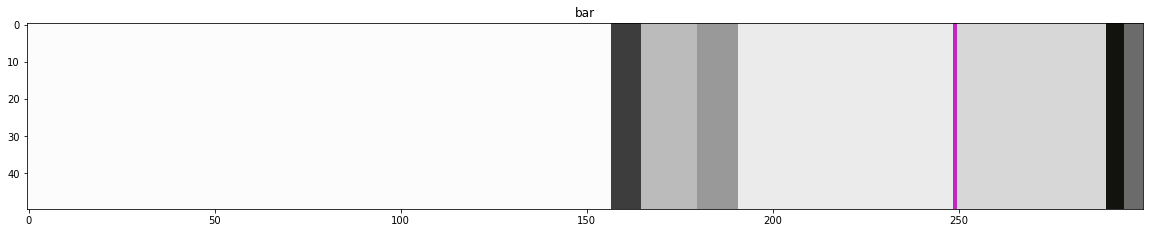

51 321
[18, 18, 15] [107, 107, 107]


/home/mscib/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars


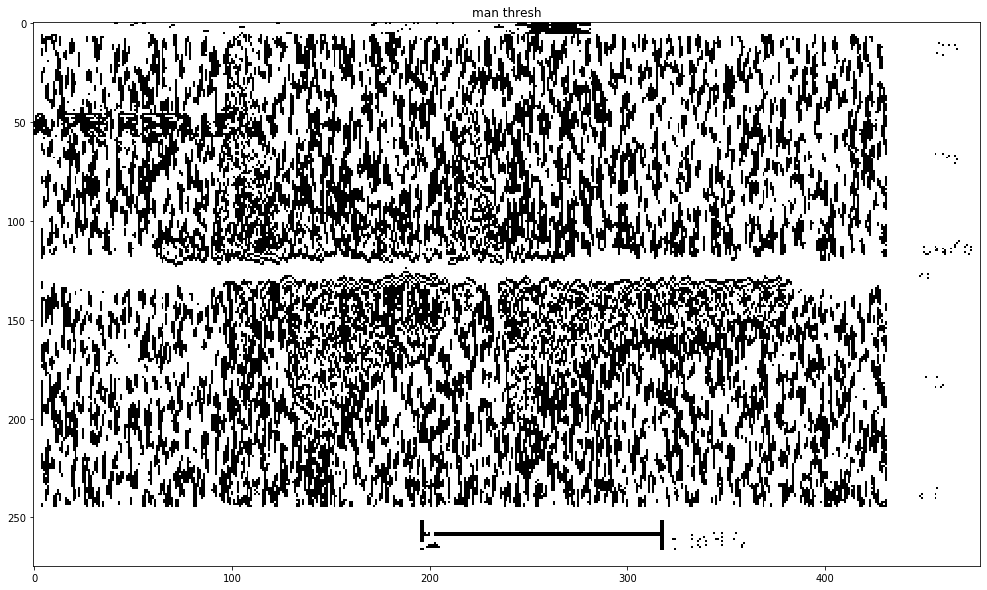

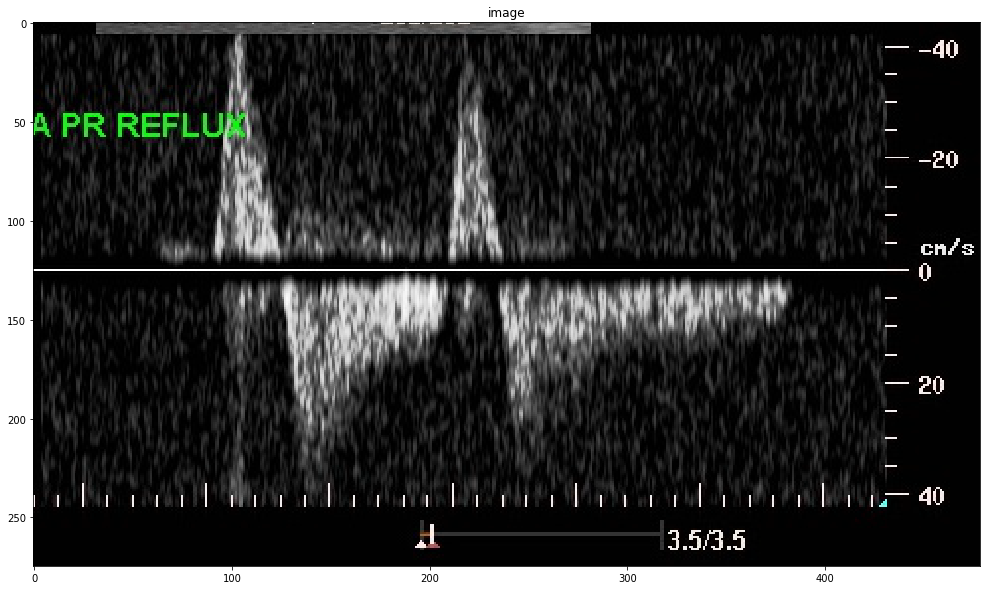

In [10]:
manaul_threshold_image_path = 'Photos/43.jpg'
manaul_image = read_image(manaul_threshold_image_path)

def manual_threshold(image):
    image = image.copy()
    rows,cols, _ = image.shape
    darknest, darker, dark, *other = get_histogram(image)
    darknest_color_sum = functools.reduce(lambda a, b: a+b, darknest)
    dark_color_sum = functools.reduce(lambda a, b: a + b, dark)
    darker_color_sum = functools.reduce(lambda a, b: a + b, darker)
    print(darknest_color_sum, dark_color_sum)
    print(darknest, dark)
    
    for i in range(rows):
        for j in range(cols):
            pixel_value = image[i, j]
            pixel_color_sum = functools.reduce(lambda a, b: a + b, pixel_value)
            if pixel_color_sum >= darknest_color_sum and pixel_color_sum < darker_color_sum:
                image[i, j] = [0, 0, 0]
            else:
                image[i, j] = [255, 255, 255]
    return image
            
    
man_thresh = manual_threshold(manaul_image)
show_image('man thresh', man_thresh)
show_image('image', manaul_image)


## Grayscale histogram

In [20]:
def grayscale_histogram(image):
    image = image.copy()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    print(hist)
    
grayscale_histogram_image = 'Photos/34.jpg'
image = read_image(grayscale_histogram_image)
grayscale_histogram(image)

[[2.3262e+04]
 [4.0206e+04]
 [1.2832e+04]
 [6.6250e+03]
 [3.9070e+03]
 [3.0330e+03]
 [2.6940e+03]
 [2.5030e+03]
 [2.4080e+03]
 [2.4590e+03]
 [2.3960e+03]
 [2.1860e+03]
 [2.3370e+03]
 [2.2130e+03]
 [2.1560e+03]
 [2.2380e+03]
 [2.1570e+03]
 [2.0560e+03]
 [1.9920e+03]
 [2.0040e+03]
 [1.9350e+03]
 [1.7700e+03]
 [1.7570e+03]
 [1.5700e+03]
 [1.5000e+03]
 [1.2800e+03]
 [1.1870e+03]
 [1.2170e+03]
 [1.1580e+03]
 [1.1780e+03]
 [1.2310e+03]
 [1.2150e+03]
 [1.1940e+03]
 [1.1600e+03]
 [1.1490e+03]
 [1.0360e+03]
 [9.4100e+02]
 [8.5100e+02]
 [8.2300e+02]
 [6.6900e+02]
 [7.0900e+02]
 [6.7600e+02]
 [5.9100e+02]
 [5.6700e+02]
 [5.2800e+02]
 [5.1500e+02]
 [5.3100e+02]
 [4.9500e+02]
 [4.7400e+02]
 [4.6200e+02]
 [4.2200e+02]
 [5.9300e+02]
 [2.7400e+02]
 [2.8900e+02]
 [2.0500e+02]
 [1.7100e+02]
 [1.6300e+02]
 [1.4800e+02]
 [1.4000e+02]
 [1.2500e+02]
 [1.1800e+02]
 [1.2400e+02]
 [1.0700e+02]
 [1.1000e+02]
 [1.0100e+02]
 [7.9000e+01]
 [7.2000e+01]
 [7.5000e+01]
 [6.3000e+01]
 [5.9000e+01]
 [7.1000e+01]
 [6.40